## Setup
Scarichiamo le librerie necessarie alla pulizia, all'analisi e alla visualizzazione dei dati.

In [3]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install folium


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Info dati
I dati sono stati scaricati da Google Big Query il giorno 05/09/2023 alle ore 20:48

! NOTA BENE ! I dati vengono aggiornati quotidianamente.

## Pulizia dei dati
Raggruppiamo tutti i dati in un unico Dataframe chiamato "combined_data".

In [6]:
import pandas as pd

# Lista dei nomi dei file CSV da unire
file_names = ["distribution_centers.csv","events.csv","inventory_items.csv","order_items.csv","orders.csv","products.csv","users.csv"]

# Crea una lista di DataFrame leggendo ciascun file CSV
dataframes = [pd.read_csv(file) for file in file_names]

# Unisci i DataFrame in un unico DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

# Ora combined_data contiene tutti i dati dai file CSV
print(combined_data)

              id            name   latitude   longitude  user_id  \
0            1.0      Memphis TN  35.117400  -89.971100      NaN   
1            2.0      Chicago IL  41.836900  -87.684700      NaN   
2            3.0      Houston TX  29.760400  -95.369800      NaN   
3            4.0  Los Angeles CA  34.050000 -118.250000      NaN   
4            5.0  New Orleans LA  29.950000  -90.066700      NaN   
...          ...             ...        ...         ...      ...   
3351165  42306.0             NaN  33.220465  126.237860      NaN   
3351166  62784.0             NaN  33.220465  126.237860      NaN   
3351167  69078.0             NaN  33.220465  126.237860      NaN   
3351168  23227.0             NaN  33.305744  126.675429      NaN   
3351169  48801.0             NaN  33.305744  126.675429      NaN   

         sequence_number session_id               created_at ip_address  \
0                    NaN        NaN                      NaN        NaN   
1                    NaN        N

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351170 entries, 0 to 3351169
Data columns (total 47 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              float64
 1   name                            object 
 2   latitude                        float64
 3   longitude                       float64
 4   user_id                         float64
 5   sequence_number                 float64
 6   session_id                      object 
 7   created_at                      object 
 8   ip_address                      object 
 9   city                            object 
 10  state                           object 
 11  postal_code                     object 
 12  browser                         object 
 13  traffic_source                  object 
 14  uri                             object 
 15  event_type                      object 
 16  product_id                      float64
 17  sold_at                    

### Verifica
Controllo valori NaN, duplicati o mancanti.

In [8]:
# Verifica la presenza di valori NaN nel DataFrame
valori_nan = combined_data.isnull().values.any()

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
combined_data.isnull().sum()

Il DataFrame contiene valori NaN.


id                                 125303
name                              3322042
latitude                          3251160
longitude                         3251160
user_id                           1744959
sequence_number                    926037
session_id                         926037
created_at                          29130
ip_address                         926037
city                               851364
state                              826037
postal_code                        826037
browser                            926037
traffic_source                     826037
uri                                926037
event_type                         926037
product_id                        2679566
sold_at                           3169675
cost                              2831941
product_category                  2861061
product_name                      2861083
product_brand                     2861500
product_retail_price              2861061
product_department                

In [9]:
# Sostituisci i valori NaN con "0"
valori_nan = combined_data.isnull().values.any()

combined_data.fillna(0, inplace=True)

In [10]:
# Rimuovi righe con dati mancanti
combined_datatest = combined_data.dropna()

# Rimuovi duplicati
combined_datatest = combined_data.drop_duplicates()

# Verifica se ci sono cambiamenti
print(combined_datatest)


              id            name   latitude   longitude  user_id  \
0            1.0      Memphis TN  35.117400  -89.971100      0.0   
1            2.0      Chicago IL  41.836900  -87.684700      0.0   
2            3.0      Houston TX  29.760400  -95.369800      0.0   
3            4.0  Los Angeles CA  34.050000 -118.250000      0.0   
4            5.0  New Orleans LA  29.950000  -90.066700      0.0   
...          ...             ...        ...         ...      ...   
3351165  42306.0               0  33.220465  126.237860      0.0   
3351166  62784.0               0  33.220465  126.237860      0.0   
3351167  69078.0               0  33.220465  126.237860      0.0   
3351168  23227.0               0  33.305744  126.675429      0.0   
3351169  48801.0               0  33.305744  126.675429      0.0   

         sequence_number session_id               created_at ip_address  \
0                    0.0          0                        0          0   
1                    0.0         

### Risultati della pulizia su combined_data

Il dataframe "combined_data" non presenta righe con dati mancanti o duplicati.

Il df "combined_data" corrisponde al df pulito "combined_datatest" con [3351170 rows x 47 columns]

Il df "combined_data" è stato modificato sostituendo i valori NaN con "0"

In [11]:
print(combined_data)

              id            name   latitude   longitude  user_id  \
0            1.0      Memphis TN  35.117400  -89.971100      0.0   
1            2.0      Chicago IL  41.836900  -87.684700      0.0   
2            3.0      Houston TX  29.760400  -95.369800      0.0   
3            4.0  Los Angeles CA  34.050000 -118.250000      0.0   
4            5.0  New Orleans LA  29.950000  -90.066700      0.0   
...          ...             ...        ...         ...      ...   
3351165  42306.0               0  33.220465  126.237860      0.0   
3351166  62784.0               0  33.220465  126.237860      0.0   
3351167  69078.0               0  33.220465  126.237860      0.0   
3351168  23227.0               0  33.305744  126.675429      0.0   
3351169  48801.0               0  33.305744  126.675429      0.0   

         sequence_number session_id               created_at ip_address  \
0                    0.0          0                        0          0   
1                    0.0         

### Pulizia di events.csv

In [12]:
import pandas as pd

events_data = pd.read_csv('events.csv')

valori_nan = events_data.isnull().values.any()

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
events_data.isnull().sum()

Il DataFrame contiene valori NaN.


id                       0
user_id            1125720
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 24342
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [13]:
valori_nan = events_data.isnull().values.any()

events_data.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
events_data.isnull().sum()

Il DataFrame contiene valori NaN.


id                 0
user_id            0
sequence_number    0
session_id         0
created_at         0
ip_address         0
city               0
state              0
postal_code        0
browser            0
traffic_source     0
uri                0
event_type         0
dtype: int64

In [14]:
# Verifica la presenza di righe duplicate
duplicati = events_data[events_data.duplicated()]
if not duplicati.empty:
    print("Sono presenti righe duplicate nel DataFrame:")
    print(duplicati)
else:
    print("Nessuna riga duplicata nel DataFrame.")

# Verifica la presenza di righe vuote (NaN)
righe_vuote = events_data[events_data.isnull().any(axis=1)]
if not righe_vuote.empty:
    print("\nSono presenti righe con valori mancanti nel DataFrame:")
    print(righe_vuote)
else:
    print("\nNessuna riga con valori mancanti nel DataFrame.")

Nessuna riga duplicata nel DataFrame.

Nessuna riga con valori mancanti nel DataFrame.


### Pulizia di inventory_items.csv

In [15]:
import pandas as pd

inventory_items = pd.read_csv('inventory_items.csv')

valori_nan = inventory_items.isnull().values.any()

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
inventory_items.isnull().sum()

Il DataFrame contiene valori NaN.


id                                     0
product_id                             0
created_at                             0
sold_at                           308614
cost                                   0
product_category                       0
product_name                          22
product_brand                        439
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

In [16]:
valori_nan = inventory_items.isnull().values.any()

inventory_items.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
inventory_items.isnull().sum()

Il DataFrame contiene valori NaN.


id                                0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_sku                       0
product_distribution_center_id    0
dtype: int64

In [17]:
# Verifica la presenza di righe duplicate
duplicati = inventory_items[inventory_items.duplicated()]
if not duplicati.empty:
    print("Sono presenti righe duplicate nel DataFrame:")
    print(duplicati)
else:
    print("Nessuna riga duplicata nel DataFrame.")

# Verifica la presenza di righe vuote (NaN)
righe_vuote = inventory_items[inventory_items.isnull().any(axis=1)]
if not righe_vuote.empty:
    print("\nSono presenti righe con valori mancanti nel DataFrame:")
    print(righe_vuote)
else:
    print("\nNessuna riga con valori mancanti nel DataFrame.")

Nessuna riga duplicata nel DataFrame.

Nessuna riga con valori mancanti nel DataFrame.


### Pulizia di order_items.csv

In [18]:
import pandas as pd

order_items = pd.read_csv('order_items.csv')

valori_nan = order_items.isnull().values.any()

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
order_items.isnull().sum()

Il DataFrame contiene valori NaN.


id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63485
delivered_at         117861
returned_at          163280
sale_price                0
dtype: int64

In [19]:
valori_nan = order_items.isnull().values.any()

order_items.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
order_items.isnull().sum()

Il DataFrame contiene valori NaN.


id                   0
order_id             0
user_id              0
product_id           0
inventory_item_id    0
status               0
created_at           0
shipped_at           0
delivered_at         0
returned_at          0
sale_price           0
dtype: int64

In [20]:
# Verifica la presenza di righe duplicate
duplicati = order_items[order_items.duplicated()]
if not duplicati.empty:
    print("Sono presenti righe duplicate nel DataFrame:")
    print(duplicati)
else:
    print("Nessuna riga duplicata nel DataFrame.")

# Verifica la presenza di righe vuote (NaN)
righe_vuote = order_items[order_items.isnull().any(axis=1)]
if not righe_vuote.empty:
    print("\nSono presenti righe con valori mancanti nel DataFrame:")
    print(righe_vuote)
else:
    print("\nNessuna riga con valori mancanti nel DataFrame.")

Nessuna riga duplicata nel DataFrame.

Nessuna riga con valori mancanti nel DataFrame.


### Pulizia di orders.csv

In [21]:
import pandas as pd

orders_data = pd.read_csv('orders.csv')

valori_nan = orders_data.isnull().values.any()

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
orders_data.isnull().sum()

Il DataFrame contiene valori NaN.


order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112693
shipped_at       43846
delivered_at     81372
num_of_item          0
dtype: int64

In [22]:
valori_nan = orders_data.isnull().values.any()

orders_data.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
orders_data.isnull().sum()

Il DataFrame contiene valori NaN.


order_id        0
user_id         0
status          0
gender          0
created_at      0
returned_at     0
shipped_at      0
delivered_at    0
num_of_item     0
dtype: int64

In [23]:
# Verifica la presenza di righe duplicate
duplicati = orders_data[orders_data.duplicated()]
if not duplicati.empty:
    print("Sono presenti righe duplicate nel DataFrame:")
    print(duplicati)
else:
    print("Nessuna riga duplicata nel DataFrame.")

# Verifica la presenza di righe vuote (NaN)
righe_vuote = orders_data[orders_data.isnull().any(axis=1)]
if not righe_vuote.empty:
    print("\nSono presenti righe con valori mancanti nel DataFrame:")
    print(righe_vuote)
else:
    print("\nNessuna riga con valori mancanti nel DataFrame.")

Nessuna riga duplicata nel DataFrame.

Nessuna riga con valori mancanti nel DataFrame.


In [24]:
orders_data

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,6,4,Shipped,F,2023-08-15 09:49:00 UTC,0,2023-08-18 05:04:00 UTC,0,2
1,17,16,Shipped,F,2023-08-26 03:42:00 UTC,0,2023-08-27 11:01:00 UTC,0,2
2,23,20,Shipped,F,2022-12-21 17:12:00 UTC,0,2022-12-24 14:32:00 UTC,0,1
3,29,24,Shipped,F,2022-03-10 12:35:00 UTC,0,2022-03-13 02:49:00 UTC,0,1
4,30,24,Shipped,F,2023-07-29 12:35:00 UTC,0,2023-07-29 22:03:00 UTC,0,1
...,...,...,...,...,...,...,...,...,...
125298,125282,99985,Processing,M,2022-03-20 06:16:00 UTC,0,0,0,1
125299,125288,99989,Processing,M,2022-09-10 16:38:00 UTC,0,0,0,2
125300,125293,99992,Processing,M,2022-01-05 02:40:00 UTC,0,0,0,1
125301,125294,99992,Processing,M,2022-07-17 02:40:00 UTC,0,0,0,3


### Pulizia di products.csv

In [25]:
import pandas as pd

products_data = pd.read_csv('products.csv')

valori_nan = products_data.isnull().values.any()

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
products_data.isnull().sum()

Il DataFrame contiene valori NaN.


id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

In [26]:
valori_nan = products_data.isnull().values.any()

products_data.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
products_data.isnull().sum()

Il DataFrame contiene valori NaN.


id                        0
cost                      0
category                  0
name                      0
brand                     0
retail_price              0
department                0
sku                       0
distribution_center_id    0
dtype: int64

In [27]:
# Verifica la presenza di righe duplicate
duplicati = products_data[products_data.duplicated()]
if not duplicati.empty:
    print("Sono presenti righe duplicate nel DataFrame:")
    print(duplicati)
else:
    print("Nessuna riga duplicata nel DataFrame.")

# Verifica la presenza di righe vuote (NaN)
righe_vuote = products_data[products_data.isnull().any(axis=1)]
if not righe_vuote.empty:
    print("\nSono presenti righe con valori mancanti nel DataFrame:")
    print(righe_vuote)
else:
    print("\nNessuna riga con valori mancanti nel DataFrame.")

Nessuna riga duplicata nel DataFrame.

Nessuna riga con valori mancanti nel DataFrame.


### Pulizia di users.csv

In [28]:
import pandas as pd

users_data = pd.read_csv('users.csv')

valori_nan = users_data.isnull().values.any()

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
users_data.isnull().sum()

Il DataFrame contiene valori NaN.


id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              985
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

In [29]:
valori_nan = users_data.isnull().values.any()

users_data.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
users_data.isnull().sum()

Il DataFrame contiene valori NaN.


id                0
first_name        0
last_name         0
email             0
age               0
gender            0
state             0
street_address    0
postal_code       0
city              0
country           0
latitude          0
longitude         0
traffic_source    0
created_at        0
dtype: int64

In [30]:
# Verifica la presenza di righe duplicate
duplicati = users_data[users_data.duplicated()]
if not duplicati.empty:
    print("Sono presenti righe duplicate nel DataFrame:")
    print(duplicati)
else:
    print("Nessuna riga duplicata nel DataFrame.")

# Verifica la presenza di righe vuote (NaN)
righe_vuote = users_data[users_data.isnull().any(axis=1)]
if not righe_vuote.empty:
    print("\nSono presenti righe con valori mancanti nel DataFrame:")
    print(righe_vuote)
else:
    print("\nNessuna riga con valori mancanti nel DataFrame.")

Nessuna riga duplicata nel DataFrame.

Nessuna riga con valori mancanti nel DataFrame.


## Analisi dei dati
Con il primo script analizziamo, nel complesso, quali sono le pagine più visitate del sito, secondo il df "events_data", realizzando un istogramma e un diagramma a torta.

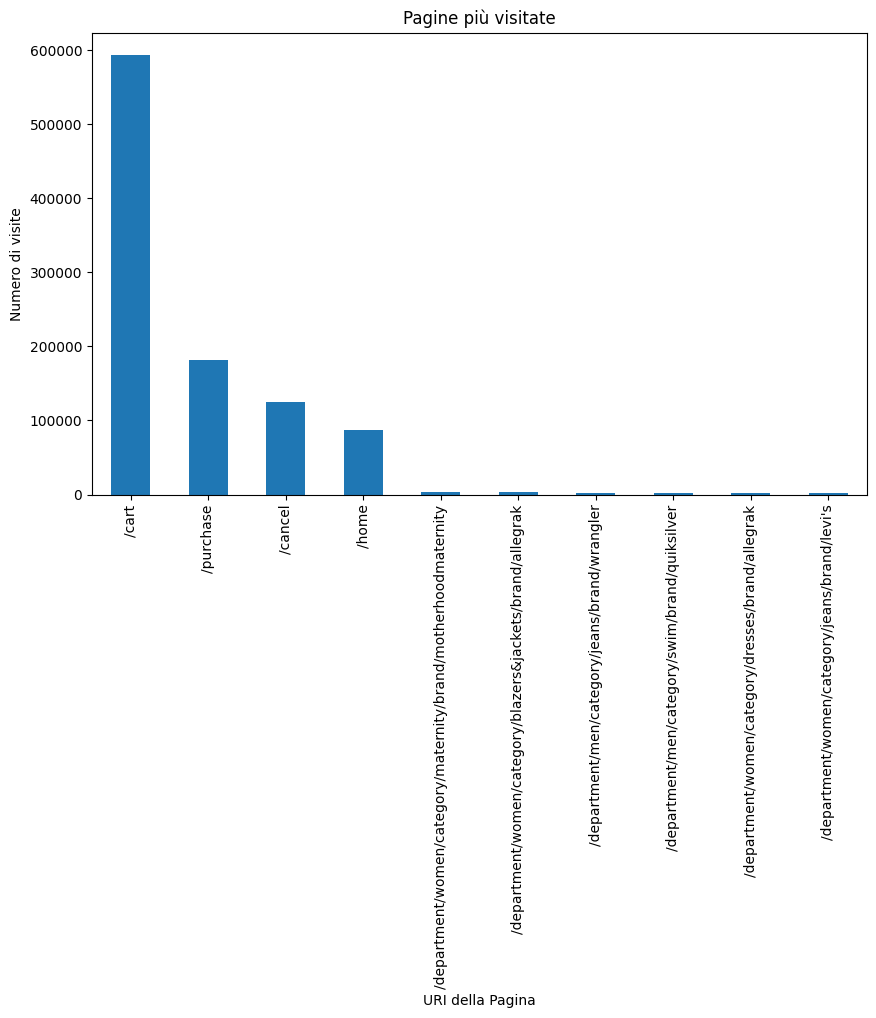

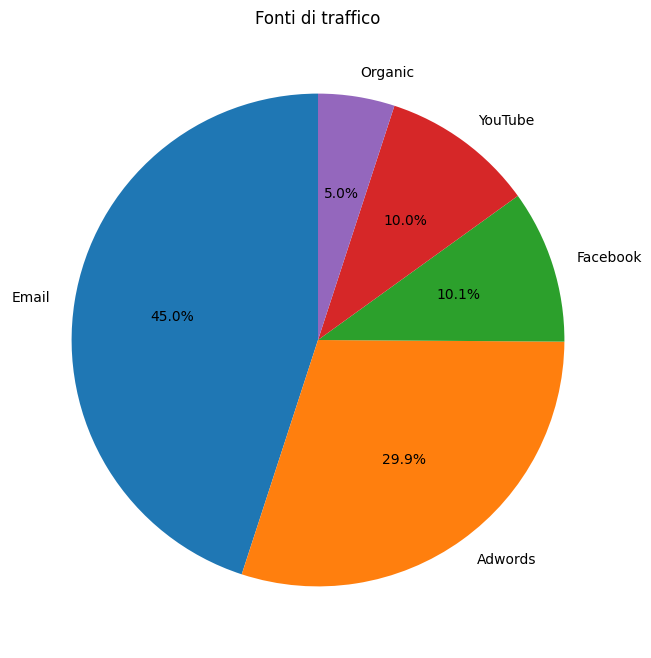

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Analizza i dati per trovare le parti più visitate del sito
most_visited_pages = events_data['uri'].value_counts().head(10)

# Crea un grafico a barre per visualizzare le pagine più visitate
plt.figure(figsize=(10, 6))
most_visited_pages.plot(kind='bar', title='Pagine più visitate')
plt.xlabel('URI della Pagina')
plt.ylabel('Numero di visite')
plt.xticks(rotation=90)
plt.show()

# Analizza i dati per trovare la fonte del traffico
traffic_sources = events_data['traffic_source'].value_counts()

# Crea un grafico a torta per visualizzare le fonti di traffico
plt.figure(figsize=(8, 8))
traffic_sources.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Fonti di traffico')
plt.ylabel('')
plt.show()


Con il seguente script analizziamo quali sono le pagine più visitate del sito secondo il df "events_data" escludendo ['/cart', '/purchase', '/cancel', '/home']

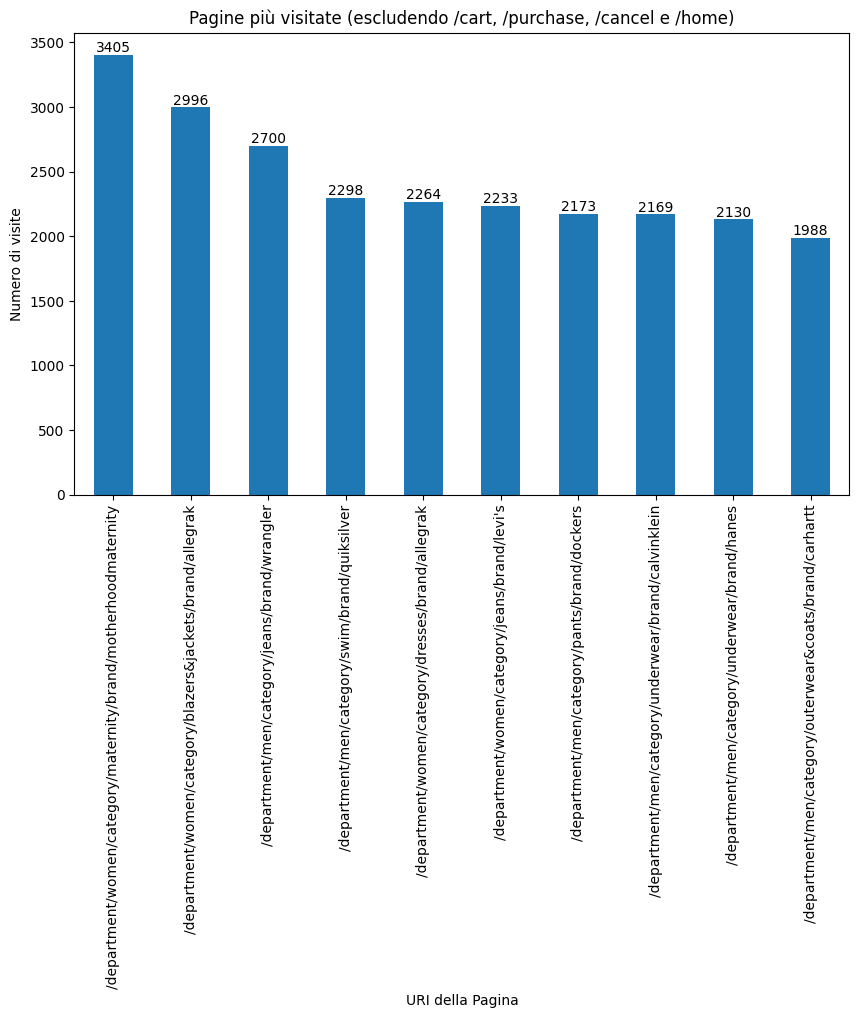

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Escludi le pagine specifiche dall'analisi
excluded_pages = ['/cart', '/purchase', '/cancel', '/home']
filtered_data = events_data[~events_data['uri'].isin(excluded_pages)]

# Analizza i dati per trovare le parti più visitate del sito (dopo l'esclusione)
most_visited_pages = filtered_data['uri'].value_counts().head(10)

# Ordina il DataFrame in base ai valori in ordine decrescente
most_visited_pages = most_visited_pages.sort_values(ascending=False)

# Crea un grafico a barre per visualizzare le pagine più visitate dopo l'esclusione
plt.figure(figsize=(10, 6))
bars = most_visited_pages.plot(kind='bar', title='Pagine più visitate (escludendo /cart, /purchase, /cancel e /home)')
plt.xlabel('URI della Pagina')
plt.ylabel('Numero di visite')
plt.xticks(rotation=90)

# Aggiungi l'etichetta del dato
for i, v in enumerate(most_visited_pages):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')
plt.show()


Da questa prima analisi possiamo evidenziare che la pagina più visitata del sito è il carrello (motivo per cui bisognerebbe puntare ad una campagna di marketing mirata sul cliente che, nel momento del check-out, potrà scegliere di acquistare altri prodotti tra quelli suggeriti). 

Escludendo le pagine di default come /cart /home /purchase /cancel si può notare che il prodotto più ricercato sul sito è "motherhoodmaternity"

Un ulteriore punto di interesse sono le fonti di traffico. Email: 50% Adwords: 29.9% Facebook: 10.1% YouTube: 10.0%  Organic: 5.0%

### Realizzazione di una mappa interattiva in Html per capire le fonti di traffico in termini locali.

In [33]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Carica i dati dalla tabella degli utenti
users_data = pd.read_csv('users.csv')

# Carica i dati dei centri di distribuzione
distribution_centers = pd.read_csv('distribution_centers.csv')

# Crea una mappa
mappa = folium.Map(zoom_start=5)

# Crea una lista di tuple contenenti le coordinate dei clienti
coordinate_clienti = list(zip(users_data['latitude'], users_data['longitude']))

# Aggiungi una mappa termica (heatmap) basata sulle coordinate dei clienti
HeatMap(coordinate_clienti).add_to(mappa)

# Aggiungi marcatori per i centri di distribuzione sulla mappa
for _, centro in distribution_centers.iterrows():
    folium.Marker([centro['latitude'], centro['longitude']], tooltip=centro['name']).add_to(mappa)

# Salva la mappa interattiva in un file html
mappa.save('mappa_provenienza_clienti.html')


### Realizzazione di uno script capace di quantificare il numero di vendite nell'arco di un anno definito.


Per rispondere a quesito abbiamo deciso di utilizzare i dati grezzi presenti in orders.csv. In questo caso alcune delle righe presenti nella colonna returned_at potranno risultare vuote. Tale situazione è stata considerata come un ordine creato ed evaso.

Gli ordini non evasi non sono considerati.

In [34]:
import pandas as pd

# Carica il tuo file CSV
df = pd.read_csv('orders.csv')

# Rimuovi le righe in cui 'returned_at' non è vuoto
df = df[df['returned_at'].isna()]

# Converte la colonna 'created_at' in datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Definisci l'anno desiderato
anno_desiderato = 2023

# Filtra il DataFrame per l'anno desiderato
df_filtrato = df[df['created_at'].dt.year == anno_desiderato]

# Conta il numero di righe nel DataFrame filtrato
conteggio_anno_desiderato = len(df_filtrato)

print(f"L'anno {anno_desiderato} ha {conteggio_anno_desiderato} ordini effettuati (escludendo quelli con un valore in 'returned_at').")

L'anno 2023 ha 46482 ordini effettuati (escludendo quelli con un valore in 'returned_at').


In [35]:
import pandas as pd

# Carica il tuo file CSV
df1 = pd.read_csv('orders.csv')

# Rimuovi le righe in cui 'returned_at' non è vuoto
df1 = df1[df1['returned_at'].isna()]

# Converte la colonna 'created_at' in datetime
df1['created_at'] = pd.to_datetime(df1['created_at'], errors='coerce')

# Definisci l'anno desiderato
anno_desiderato = 2022

# Filtra il DataFrame per l'anno desiderato
df1_filtrato = df1[df1['created_at'].dt.year == anno_desiderato]

# Conta il numero di righe nel DataFrame filtrato
conteggio_anno_desiderato = len(df1_filtrato)

print(f"L'anno {anno_desiderato} ha {conteggio_anno_desiderato} ordini effettuati (escludendo quelli con un valore in 'returned_at').")

L'anno 2022 ha 33160 ordini effettuati (escludendo quelli con un valore in 'returned_at').


In [36]:
import pandas as pd

# Carica il tuo file CSV
df3 = pd.read_csv('orders.csv')

# Rimuovi le righe in cui 'returned_at' non è vuoto
df3 = df3[df3['returned_at'].isna()]

# Converte la colonna 'created_at' in datetime
df3['created_at'] = pd.to_datetime(df3['created_at'], errors='coerce')

# Definisci l'anno desiderato
anno_desiderato = 2021

# Filtra il DataFrame per l'anno desiderato
df3_filtrato = df3[df3['created_at'].dt.year == anno_desiderato]

# Conta il numero di righe nel DataFrame filtrato
conteggio_anno_desiderato = len(df3_filtrato)

print(f"L'anno {anno_desiderato} ha {conteggio_anno_desiderato} ordini effettuati (escludendo quelli con un valore in 'returned_at').")

L'anno 2021 ha 18346 ordini effettuati (escludendo quelli con un valore in 'returned_at').


In [37]:
import pandas as pd

# Carica il tuo file CSV
df4 = pd.read_csv('orders.csv')

# Rimuovi le righe in cui 'returned_at' non è vuoto
df4 = df4[df4['returned_at'].isna()]

# Converte la colonna 'created_at' in datetime
df4['created_at'] = pd.to_datetime(df4['created_at'], errors='coerce')

# Definisci l'anno desiderato
anno_desiderato = 2020

# Filtra il DataFrame per l'anno desiderato
df4_filtrato = df4[df4['created_at'].dt.year == anno_desiderato]

# Conta il numero di righe nel DataFrame filtrato
conteggio_anno_desiderato = len(df4_filtrato)

print(f"L'anno {anno_desiderato} ha {conteggio_anno_desiderato} ordini effettuati (escludendo quelli con un valore in 'returned_at').")

L'anno 2020 ha 9240 ordini effettuati (escludendo quelli con un valore in 'returned_at').


Da questa analisi si evince che l'anno con il maggior numero di ordini evasi è il 2023.

### Realizzazione di uno script capace di quantificare i 10 prodotti più venduti in tutto l'arco temporale

In [38]:
# Conta le occorrenze di ciascun product_name
product_counts = inventory_items['product_name'].value_counts()

# Trova i 5 product_name più ripetuti
top_10_product_names = product_counts.head(10)

# Stampa i 5 product_name più ripetuti
print("I 10 product_name più ripetuti sono:")
print(top_10_product_names)

I 10 product_name più ripetuti sono:
product_name
Wrangler Men's Premium Performance Cowboy Cut Jean     171
Wrangler Men's Wrancher Dress Jean                     130
Thorlo Unisex Experia Running Sock                     100
Wrangler Men's Original Cowboy Cut Relaxed Fit Jean     99
Pearl iZUMi Attack Sock 3-Pack                          99
HUGO BOSS Men's Long Pant                               98
Wrangler Men's Genuine Tampa Cargo Short                89
Rusty Men's Goombah Too Boardshort                      87
Joe's Jeans Men's Slim Fit Straight Leg Brixton         85
George Strait by Wrangler Men's Cowboy Cut Jean         84
Name: count, dtype: int64


### Previsioni con il Machine Learning


L'obiettivo di questa analisi è capire se si possono ottenere previsioni utili sulle vendite possibili nell'arco del 2024.

Per addestrare il modello abbiamo deciso di realizzare un dataframe "mhlr" contenente i soli dati relativi al 2022.

In [39]:
mhlr = pd.read_csv("inventory_items.csv")

In [40]:
valori_nan = mhlr.isnull().values.any()

mhlr.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
mhlr.isnull().sum()

Il DataFrame contiene valori NaN.


id                                0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_sku                       0
product_distribution_center_id    0
dtype: int64

In [41]:
mhlr['product_name'] = mhlr['product_name'].astype(str)
mhlr['product_category'] = mhlr['product_category'].astype(str)
mhlr['product_brand'] = mhlr['product_brand'].astype(str)
mhlr['product_department'] = mhlr['product_department'].astype(str)
mhlr['product_sku'] = mhlr['product_sku'].astype(str)

In [42]:
mhlr['sales_quantity'] = mhlr['cost'] / mhlr['product_retail_price']

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Codifica delle variabili categoriche
le = LabelEncoder()
mhlr['product_category'] = le.fit_transform(mhlr['product_category'])
mhlr['product_name'] = le.fit_transform(mhlr['product_name'])
mhlr['product_brand'] = le.fit_transform(mhlr['product_brand'])
mhlr['product_department'] = le.fit_transform(mhlr['product_department'])
mhlr['product_sku'] = le.fit_transform(mhlr['product_sku'])

# Seleziona le features e il target
X = mhlr[['product_id', 'cost', 'product_category', 'product_name', 'product_brand', 'product_retail_price', 'product_department', 'product_sku', 'product_distribution_center_id']]
y = mhlr['sales_quantity']

# Standardizzazione delle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dei dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Addestramento del modello di regressione lineare
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predizione sul set di test
y_pred = regression_model.predict(X_test)

# Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.00265286355861362
R-squared (R2): 0.48835905310893746


Dopo aver allenato il modello abbiamo deciso di effettuare delle analisi su "inventory_items140923"

Il dataframe preso in considerazione è stato relizzato estrapolando da Big Query dati inerenti agli ultimi 14 giorni.

In [48]:
inventory_items140923 = pd.read_csv("inventory_items140923.csv")

In [49]:
valori_nan = inventory_items140923.isnull().values.any()

inventory_items140923.fillna(0, inplace=True)

if valori_nan:
    print("Il DataFrame contiene valori NaN.")
else:
    print("Il DataFrame non contiene valori NaN.")
inventory_items140923.isnull().sum()

Il DataFrame contiene valori NaN.


id                                0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_sku                       0
product_distribution_center_id    0
dtype: int64

In [50]:
inventory_items140923['product_name'] = inventory_items140923['product_name'].astype(str)
inventory_items140923['product_category'] = inventory_items140923['product_category'].astype(str)
inventory_items140923['product_brand'] = inventory_items140923['product_brand'].astype(str)
inventory_items140923['product_department'] = inventory_items140923['product_department'].astype(str)
inventory_items140923['product_sku'] = inventory_items140923['product_sku'].astype(str)

In [66]:
inventory_items140923['sales_quantity'] = inventory_items140923['cost'] / inventory_items140923['product_retail_price']

In [71]:
# Effettua l'encoding one-hot delle colonne categoriche in 'inventory_items'
inventory_items_encoded = pd.get_dummies(inventory_items140923, columns=['product_name', 'product_category', 'product_brand', 'product_department', 'product_sku'])

# Applica la standardizzazione ai dati di 'inventory_items_encoded'
inventory_items_scaled = scaler.transform(inventory_items_encoded[['sales_quantity']])

# Effettua previsioni sulle vendite future
sales_predictions = regression_model.predict(inventory_items_scaled)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- sales_quantity
Feature names seen at fit time, yet now missing:
- cost
- product_brand
- product_category
- product_department
- product_distribution_center_id
- ...
